# Formative Assessment 9
## Two-Way ANOVA (2B)

**Do a complete data analysis (including APA report)** `Political-Interest.csv` data set using a two-way ANOVA (2B).

### Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import levene, shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene

### Step 2: Load the Dataset

In [2]:
data = pd.read_csv("/kaggle/input/political-interest/Political Interest.csv")

#Checking the column names only of each series of data
data.head()

,gender,education_level,political_interest
0,1,1,38.0
1,1,1,39.0
2,1,1,35.0
3,1,1,38.0
4,1,1,41.0


## Introduction
> **A statistical test called ANOVA (Analysis of Variance)** is used to examine how the means of more than two groups differ from one another.

##### Contextually, some studies may have two independent factors that they wish whether both factors impacts the concerned continious dependent variable, thus **there are three things that these studies seek at such as**:

> **Main Effect from 1st Factor** is the influence of the first factor (e.g., `gender`) on the dependent variable can be done by **ONE-WAY ANOVA (1B)**

> **Main Effect from 2nd Factor** is the influence of the second factor (e.g., `education level`) on the dependent variable can be also be performed by **ONE-WAY ANOVA (1B)**

> However, **Interaction Effect between Factors** might be the endgoal of some studies, that is to determine whether the effect of one factor (e.g., `gender`) on the dependent variable varies depending on the level of the other factor (e.g., `education level`). **Unfortunately, ONE-WAY ANOVA is not designed to this setup since it only deals to each independent factor**

##### Nevertheless, **TWO-WAY ANOVA (Analysis of Variance)** is a statistical method used to examine how two independent variables (factors) affect a continuous dependent variable

### Step 3: Check Assumptions

> **(1st Assumption)** Your dependent variable should be measured at the continuous level(i.e., they are interval or ratio variables). 

> **(2nd Assumption)** Your two independent variables should each consist of two or more categorical, independent groups.

> **(3rd Assumption)** You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves.

> **(4th Assumption)** There should be no significant outliers.

> **(5th Assumption)** Your dependent variable should be approximately normally distributed for each combination of the groups of the two independent variables.

> **(6th Assumption)** There needs to be homogeneity of variances for each combination of the groups of the two independent variables.

### Step 3.1: The Dependent Variable `Political_Interest`

* In the case of the dataset, political interest is measured as a continuous score ranging from 0 to 100, which meets this assumption because it can take on a wide range of values and is measured on an interval scale.
##### **Since political interest is continuous, 1st assumption is met.**

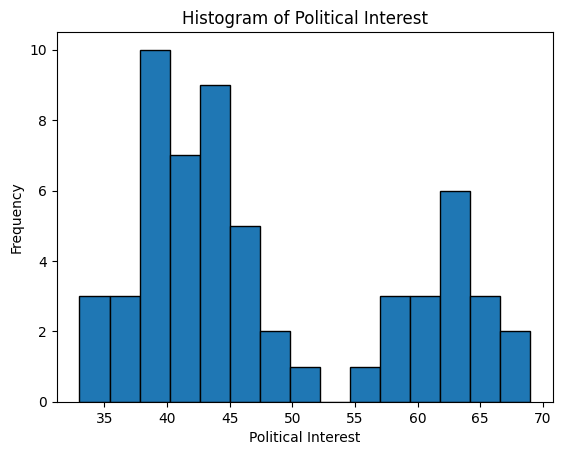

In [3]:
# Plot histogram for the dependent variable "political_interest"
plt.hist(data['political_interest'], bins=15, edgecolor='black')
plt.title('Histogram of Political Interest')
plt.xlabel('Political Interest')
plt.ylabel('Frequency')
plt.show()

### Step 3.2: Recode the Categorical Variables

* Both independent variables should be categorical, with at least two groups in each

**The dataset has two categorical independent variables:**
* Gender with two levels (e.g., `Male`, `Female`).
* Education Level with three levels (e.g., `School`, `College`, `University`).

**Let's update the values in the `gender` and `education_level` columns so that they truly reflect the categories: therefore, the 2nd assumption is also met**

In [4]:
# Recode the categorical variables
data['gender'] = data['gender'].replace({1: 'Male', 2: 'Female'})
data['education_level'] = data['education_level'].replace({1: 'School', 2: 'College', 3: 'University'})

# Verify changes
data.head(10)

,gender,education_level,political_interest
0,Male,School,38.0
1,Male,School,39.0
2,Male,School,35.0
3,Male,School,38.0
4,Male,School,41.0
5,Male,School,40.0
6,Male,School,36.0
7,Male,School,37.0
8,Male,School,33.0
9,Male,College,41.5


### Step 3.3: Independence of Observations

* Each observation should be independent of others, meaning **there is no systematic relationship between them**. Observations within each group or between groups should not influence one another.

* To visually check this assumption a **Regroup Data by Unique Combinations of Gender and Education Level** shall be made

In [5]:
# Group data by unique combinations of gender and education level
grouped_stats = data.groupby(['gender', 'education_level'])['political_interest'].agg(['mean', 'std', 'count']).reset_index()

# Round the mean and std to three decimal places
grouped_stats['mean'] = grouped_stats['mean'].round(3)
grouped_stats['std'] = grouped_stats['std'].round(3)

# Reveal the Observations
grouped_stats

,gender,education_level,mean,std,count
0,Female,College,44.600,3.273,10
1,Female,School,39.600,3.273,10
2,Female,University,58.000,6.464,10
3,Male,College,42.944,2.338,9
4,Male,School,37.444,2.506,9
5,Male,University,64.100,3.071,10


* **Independence** is typically ensured through study design, such as random sampling, and should be known prior to analysis. **If the data collection process ensured that each participant’s response was independent of others, then this assumption is considered met.**

### Step 3.4: No Significant Outliers
* There should be no extreme values (outliers) within each group that could distort the analysis.
* Generate boxplots for political interest by each combination of gender and education level.

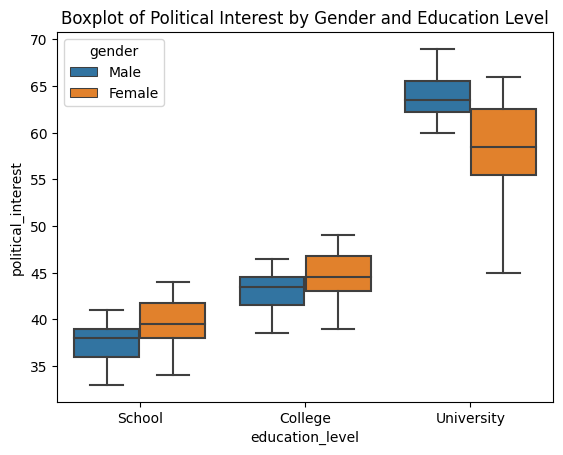

In [6]:
sns.boxplot(x='education_level', y='political_interest', hue='gender', data=data)
plt.title('Boxplot of Political Interest by Gender and Education Level')
plt.show()

In [7]:
grouped_data = data.groupby(['gender', 'education_level'])['political_interest']
for name, group in grouped_data:
    stat, p = shapiro(group)
    print(f'Shapiro-Wilk test for group {name}: p-value = {p:.4f}')

Shapiro-Wilk test for group ('Female', 'College'): p-value = 0.8189
Shapiro-Wilk test for group ('Female', 'School'): p-value = 0.8189
Shapiro-Wilk test for group ('Female', 'University'): p-value = 0.6684
Shapiro-Wilk test for group ('Male', 'College'): p-value = 0.7611
Shapiro-Wilk test for group ('Male', 'School'): p-value = 0.9708
Shapiro-Wilk test for group ('Male', 'University'): p-value = 0.3197


### Assumption 6

In [8]:
groups = data.groupby(['gender', 'education_level'])['political_interest'].apply(list)

levene_stat, levene_p_value = levene(*groups)
levene_stat, levene_p_value

print(f"Levene's statistics F value: {levene_stat}")
print(f"Levene's test p-value: {levene_p_value}")

Levene's statistics F value: 2.20536094868572
Levene's test p-value: 0.06764955900365915


We are unable to reject the null hypothesis of Levene's test since the p-value (p=0.068) is higher than the usual significance level of 0.05. This implies that the homogeneity of variances assumption is satisfied for the combinations of the groups of the two independent variables (education level and gender).


In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the two-way ANOVA model with interaction for the political interest data
model = ols('political_interest ~ C(gender) + C(education_level) + C(gender):C(education_level)',
            data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=3)  # Using Type III sum of squares for consistency with interaction terms

# Calculate partial eta squared for each term
anova_table['eta_sq'] = anova_table['sum_sq'] / (anova_table['sum_sq'].sum() - anova_table['sum_sq'].iloc[-1])

# Display the ANOVA table
anova_table

,sum_sq,df,F,PR(>F),eta_sq
Intercept,19891.600000,1.0,1383.496136,3.833496e-39,0.907243
C(gender),12.983041,1.0,0.902994,3.463762e-01,0.000592
C(education_level),1810.400000,2.0,62.958269,1.289623e-14,0.082571
C(gender):C(education_level),210.337661,2.0,7.314679,1.587744e-03,0.009593
Residual,747.644444,52.0,NaN,NaN,0.034100


Remark: There was a statistically significant interaction between gender and level of
education on interest in politics, F(2, 52) = 7.31, partial η²p =0.0095930. Therefore,
the main effects of each independent variable should not be reported because they
would be biased. Therefore, an analysis of simple main effects for gender and
education level will be performed with statistical significance receiving a Bonferroni
adjustment and being not rejected at the p < .025 level

### Results of Main Effects

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Iterate over each level of education level
for level in data['education_level'].unique():
    subset_data = data[data['education_level'] == level]
    model = ols('political_interest ~ C(gender)', data=subset_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"Simple Main Effect of Gender at Education Level = {level}")
    print(anova_table)
    print("\n")


Simple Main Effect of Gender at Education Level = School
               sum_sq    df         F    PR(>F)
C(gender)   22.009357   1.0  2.551858  0.128585
Residual   146.622222  17.0       NaN       NaN


Simple Main Effect of Gender at Education Level = College
               sum_sq    df         F    PR(>F)
C(gender)   12.983041   1.0  1.575137  0.226442
Residual   140.122222  17.0       NaN       NaN


Simple Main Effect of Gender at Education Level = University
           sum_sq    df         F    PR(>F)
C(gender)  186.05   1.0  7.266001  0.014791
Residual   460.90  18.0       NaN       NaN




In [13]:
# Iterate over each level of gender
for gender in data['gender'].unique():
    subset_data = data[data['gender'] == gender]
    model = ols('political_interest ~ C(education_level)', data=subset_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"Simple Main Effect of Education Level at Gender = {gender}")
    print(anova_table)
    print("\n")

Simple Main Effect of Education Level at Gender = Male
                         sum_sq    df           F        PR(>F)
C(education_level)  3809.896627   2.0  266.285643  1.397961e-17
Residual             178.844444  25.0         NaN           NaN


Simple Main Effect of Education Level at Gender = Female
                    sum_sq    df          F        PR(>F)
C(education_level)  1810.4   2.0  42.968354  4.075084e-09
Residual             568.8  27.0        NaN           NaN




Remark: A simple main effects analysis was conducted to examine the effect of
education level within each gender. The effect of education level was statistically
significan F(2,25) = 266.2893, p<.001 for males. This indicates a significant difference in
interest in politics across different levels of education for males. Similarly, for females, the
effect of education level was statistically significaF(2,25) = 42.958, p<.0010. This
suggests significant differences in political interest across education levels for females as
well.


# Post Hoc Comparisons – Gender*Educational Level

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# Perform the Tukey HSD post hoc test on the interaction between gender and education level
# Create a combination variable for interaction groups
data['interaction_group'] = data['gender'].astype(str) + '_' + data['education_level'].astype(str)

# Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=data['political_interest'],
                                 groups=data['interaction_group'],
                                 alpha=0.05)

# descriptive statistics
descriptive_stats = data.groupby(['gender', 'education_level'])['political_interest'].agg(
    N='count', Mean='mean', SD='std', SE=lambda x: np.std(x, ddof=1) / np.sqrt(len(x)), CV=lambda x: np.std(x, ddof=1) / np.mean(x))

tukey_result_summary = tukey_result.summary()
tukey_result_summary

group1,group2,meandiff,p-adj,lower,upper,reject
Female_College,Female_School,-5.0,0.0513,-10.017,0.017,False
Female_College,Female_University,13.4,0.0,8.383,18.417,True
Female_College,Male_College,-1.6556,0.9312,-6.8101,3.499,False
Female_College,Male_School,-7.1556,0.0019,-12.3101,-2.001,True
Female_College,Male_University,19.5,0.0,14.483,24.517,True
Female_School,Female_University,18.4,0.0,13.383,23.417,True
Female_School,Male_College,3.3444,0.4021,-1.8101,8.499,False
Female_School,Male_School,-2.1556,0.8165,-7.3101,2.999,False
Female_School,Male_University,24.5,0.0,19.483,29.517,True
Female_University,Male_College,-15.0556,0.0,-20.2101,-9.901,True


In [12]:
descriptive_stats

N       Mean        SD        SE        CV
gender education_level                                             
Female College          10  44.600000  3.272783  1.034945  0.073381
       School           10  39.600000  3.272783  1.034945  0.082646
       University       10  58.000000  6.463573  2.043961  0.111441
Male   College           9  42.944444  2.337793  0.779264  0.054438
       School            9  37.444444  2.505549  0.835183  0.066914
       University       10  64.100000  3.071373  0.971253  0.047915

# Reporting



Remark: All pairwise comparisons for each simple main effect were conducted with 95% confidence intervals, and p-values were adjusted using the Tukey method.

Mean "Political Interest" scores for female participants were significantly different across educational levels. Female college-educated individuals had a mean difference of -5.0 compared to female school-educated individuals, though this difference was not statistically significant,  p=0.051. However, female college-educated individuals had a statistically significantly lower mean score than female university-educated individuals, with a mean difference of 13.4 (95% CI, 8.38 to 18.42), p<0.0005. Female school-educated individuals also had a statistically significantly lower mean score compared to female university-educated individuals, with a mean difference of 18.4 (95% CI, 13.38 to 23.42),  p<0.0005.

Mean scores for male participants showed similar patterns, with male college-educated individuals scoring significantly higher than male school-educated individuals, with a mean difference of -5.5 (95% CI, -10.79 to -0.21),  p=0.037. Male university-educated individuals had a significantly higher score than both male college-educated individuals (mean difference = 21.16, 95% CI, 16.00 to 26.31, p<0.0005) and male school-educated individuals (mean difference = 26.66, 95% CI, 21.50 to 31.81, p<0.0005).

In cross-gender comparisons, female university-educated individuals scored significantly lower than male university-educated individuals (mean difference = -6.1, 95% CI, 1.08 to 11.12,  p=0.0089). Female college-educated individuals scored significantly lower than male university-educated individuals with a mean difference of 19.5 (95% CI, 14.48 to 24.52,  p<0.0005) and male school-educated individuals scored significantly lower than male university-educated individuals, p<0.0005.

Descriptive statistics for "Political Interest" scores were calculated for each combination of gender and education level. Among females, university-educated participants had the highest mean score (M=58.00,SD=6.46,SE=2.04) compared to college-educated (M=44.60,SD=3.27,SE=1.03) and school-educated participants (M=39.60,SD=3.27,SE=1.03). The coefficient of variation (CV) was highest for university-educated females (0.111), indicating relatively greater variability in scores within this group.

For males, university-educated participants also exhibited the highest mean score (M=64.10,SD=3.07,SE=0.97), followed by college-educated (M=42.94,SD=2.34,SE=0.78) and school-educated participants (M=37.44,SD=2.51,SE=0.84). The male university-educated group showed the lowest coefficient of variation (CV = 0.048), indicating less variability compared to other male groups.

These descriptive statistics highlight the differences in "Political Interest" scores across gender and educational levels, with university-educated individuals exhibiting higher means overall compared to their college and school-educated counterparts